<a href="https://colab.research.google.com/github/royarkaofficial/DataOps-Case-Study-Assignment-15th_Jan/blob/main/Case_Study_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: E-Commerce Customer Purchase Prediction

You are working as a Data Scientist for an e-commerce company aiming to enhance customer experience and predict customer behaviour. The business goal is to predict whether a customer will make a purchase during their next visit based on their past interactions and demographics. This prediction can help the marketing team identify potential buyers and design targeted campaigns.

Dataset Description:

The dataset contains customer interaction data, including demographics, purchase history, browsing behavior, and feedback text. The features are as follows:

CustomerID: Unique identifier for the customer.

Age: Age of the customer.

Gender: Gender of the customer (e.g., Male, Female).

AnnualIncome: Customer's yearly income in USD.

LastPurchaseAmount: Amount spent in the last purchase (in USD).

BrowsingTime: Time spent browsing the e-commerce site during the last session (in minutes).

Feedback: Customer feedback or comments on the website experience.

Region: Region where the customer is located.
Purchased: Target variable (1 = Purchased, 0 = Not Purchased).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries for data manipulation, numerical operations, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing tools to handle missing data and scale numerical features
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Importing tools to convert text data into numerical form
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Importing function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing different machine learning models for classification tasks
from sklearn.linear_model import LogisticRegression  # Simple, effective linear classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models for robust predictions
from sklearn.svm import SVC  # Powerful classifier, good with complex relationships

# Importing metrics to evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Quick overview:
# - SimpleImputer: fills in missing data (mean, median, or mode)
# - MinMaxScaler & StandardScaler: adjust numerical data to a common scale
# - CountVectorizer & TfidfVectorizer: transform text data into numerical features
# - train_test_split: divides data into training and testing parts
# - Models (LogisticRegression, RandomForest, etc.): make predictions based on data patterns
# - Metrics (accuracy_score, etc.): tell us how well our models perform

Data Cleaning and Preprocessing Steps:

1. Handling Missing Values

a) Numeric Columns:

Impute missing values using mean or median for columns like Age, AnnualIncome, and LastPurchaseAmount.

b) Categorical Columns:

Replace missing values in Gender and Region with the mode or Unknown.

c) Text Column (Feedback):

Fill missing values with "No Feedback".

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
# The file is stored in Google Drive and accessed through Google Colab
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/ecommerce_customer_data.csv')
data

,CustomerID,Age,Gender,AnnualIncome,LastPurchaseAmount,BrowsingTime,Feedback,Region,Purchased
0,CUST0001,56.0,Female,74340.0,246.447653,82.098824,No stock,East,1
1,CUST0002,69.0,female,NaN,243.877231,91.467115,Great service!,East,0
2,CUST0003,46.0,female,98832.0,1301.928501,71.881010,No stock,North,0
3,CUST0004,32.0,M,71293.0,1494.629310,57.117566,NaN,north,0
4,CUST0005,60.0,Male,115981.0,1170.903843,50.009069,Amazing deals,East,0
...,...,...,...,...,...,...,...,...,...
250,CUST0224,66.0,F,60262.0,350.066299,118.143860,Poor experience,South,0
251,CUST0245,28.0,male,24748.0,277.485207,109.815022,NaN,East,0
252,CUST0199,20.0,F,97052.0,732.533770,41.676265,No stock,south,1
253,CUST0046,26.0,M,69115.0,1372.615033,17.573377,Poor experience,South,0


In [ ]:
import pandas as pd  # Import pandas for data manipulation

# Step 1: Handling missing values in numeric columns
# If any of these columns (Age, AnnualIncome, LastPurchaseAmount) have missing values, we replace them with appropriate statistics.
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Fill missing Age values with the column's mean
data['AnnualIncome'] = data['AnnualIncome'].fillna(data['AnnualIncome'].mean())  # Fill missing AnnualIncome with mean
data['LastPurchaseAmount'] = data['LastPurchaseAmount'].fillna(data['LastPurchaseAmount'].median())  # Use median for LastPurchaseAmount to avoid outliers affecting the mean

# Step 2: Handling missing values in categorical columns
# Categorical values are usually replaced with the most frequent value (mode) or a default category.
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])  # Fill missing Gender with the most common value (mode)
data['Region'] = data['Region'].fillna('Unknown')  # If Region is missing, assign 'Unknown' instead of dropping the data

# Step 3: Handling missing values in text columns
# For text-based features, missing values can be replaced with a placeholder string.
data['Feedback'] = data['Feedback'].fillna('No Feedback')  # If feedback is missing, assign 'No Feedback'

# Print the cleaned dataset to verify changes
data

,CustomerID,Age,Gender,AnnualIncome,LastPurchaseAmount,BrowsingTime,Feedback,Region,Purchased
0,CUST0001,56.0,Female,74340.000000,246.447653,82.098824,No stock,East,1
1,CUST0002,69.0,female,90226.703863,243.877231,91.467115,Great service!,East,0
2,CUST0003,46.0,female,98832.000000,1301.928501,71.881010,No stock,North,0
3,CUST0004,32.0,M,71293.000000,1494.629310,57.117566,No Feedback,north,0
4,CUST0005,60.0,Male,115981.000000,1170.903843,50.009069,Amazing deals,East,0
...,...,...,...,...,...,...,...,...,...
250,CUST0224,66.0,F,60262.000000,350.066299,118.143860,Poor experience,South,0
251,CUST0245,28.0,male,24748.000000,277.485207,109.815022,No Feedback,East,0
252,CUST0199,20.0,F,97052.000000,732.533770,41.676265,No stock,south,1
253,CUST0046,26.0,M,69115.000000,1372.615033,17.573377,Poor experience,South,0


2. Outlier Detection

Detect outliers in numeric features (AnnualIncome, LastPurchaseAmount, and BrowsingTime) using:

Z-scores: Remove values exceeding ±3 standard deviations.

IQR Method: Remove data outside 1.5 times the interquartile range.

Handle outliers by capping extreme values to the 5th and 95th percentiles.

In [ ]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical operations
from scipy import stats  # Import stats module from scipy for statistical calculations

# Assuming 'data' is your DataFrame with numerical columns
# Define the numeric columns on which to perform outlier detection and handling
numeric_columns = ['AnnualIncome', 'LastPurchaseAmount', 'BrowsingTime']

# === Z-Score Method: Detect and remove outliers using z-scores ===
# Z-score measures how far a data point is from the mean in terms of standard deviations
# Compute the absolute z-scores for each value in the numeric columns
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Identify rows where any column has a z-score greater than 3 (considered an outlier)
z_outliers = (z_scores > 3).any(axis=1)

# Remove rows where at least one numeric column has a z-score greater than 3
data_no_z_outliers = data[~z_outliers]

# === IQR Method: Detect and remove outliers using the interquartile range (IQR) ===
# The IQR method identifies outliers based on quartiles (Q1 and Q3)
# Calculate the 1st quartile (Q1) and 3rd quartile (Q3) for each numeric column
Q1 = data[numeric_columns].quantile(0.25)  # 25th percentile
Q3 = data[numeric_columns].quantile(0.75)  # 75th percentile

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers (anything outside this range is considered an outlier)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where any value is outside the IQR-defined bounds
iqr_outliers = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)

# Remove rows that contain outliers based on IQR
data_no_iqr_outliers = data[~iqr_outliers]

# === Capping extreme values: Handling outliers by limiting values within a range ===
# Instead of removing outliers, we cap them at a specific percentile (5th and 95th)
# Calculate the 5th and 95th percentiles for each numeric column
percentiles = data[numeric_columns].quantile([0.05, 0.95])

# Create a copy of the original data for capping the extreme values
data_capped = data.copy()

# Replace values below the 5th percentile with the 5th percentile value
# Replace values above the 95th percentile with the 95th percentile value
for col in numeric_columns:
    data_capped[col] = data_capped[col].clip(lower=percentiles.loc[0.05, col], upper=percentiles.loc[0.95, col])

# === Print the results of each method to compare the outcomes ===
print("Data after removing outliers based on Z-scores:")
print(data_no_z_outliers)

print("\nData after removing outliers based on IQR method:")
print(data_no_iqr_outliers)

print("\nData after capping extreme values to 5th and 95th percentiles:")
print(data_capped)

Data after removing outliers based on Z-scores:
    CustomerID   Age  Gender   AnnualIncome  LastPurchaseAmount  BrowsingTime  \
0     CUST0001  56.0  Female   74340.000000          246.447653     82.098824   
1     CUST0002  69.0  female   90226.703863          243.877231     91.467115   
2     CUST0003  46.0  female   98832.000000         1301.928501     71.881010   
3     CUST0004  32.0       M   71293.000000         1494.629310     57.117566   
4     CUST0005  60.0    Male  115981.000000         1170.903843     50.009069   
..         ...   ...     ...            ...                 ...           ...   
250   CUST0224  66.0       F   60262.000000          350.066299    118.143860   
251   CUST0245  28.0    male   24748.000000          277.485207    109.815022   
252   CUST0199  20.0       F   97052.000000          732.533770     41.676265   
253   CUST0046  26.0       M   69115.000000         1372.615033     17.573377   
254   CUST0202  25.0  female   41677.000000          718.6324

3. Standardization

Normalize numeric features (Age, AnnualIncome, LastPurchaseAmount, BrowsingTime) using:

MinMaxScaler: Scales values between 0 and 1.

StandardScaler: Standardizes data to have zero mean and unit variance.

In [ ]:
import pandas as pd  # Import pandas for data manipulation
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Import MinMaxScaler and StandardScaler from sklearn

# Define the numeric columns that need to be scaled
numeric_columns = ['Age', 'AnnualIncome', 'LastPurchaseAmount', 'BrowsingTime']

# === Initialize the scalers ===
# MinMaxScaler scales data to a range between 0 and 1 (or a specified range)
min_max_scaler = MinMaxScaler()

# StandardScaler standardizes data to have a mean of 0 and a standard deviation of 1
standard_scaler = StandardScaler()

# === Apply MinMaxScaler ===
# Make a copy of the original data to apply MinMax scaling, so that original data is not modified
data_minmax_scaled = data.copy()

# Use MinMaxScaler to transform the numeric columns and scale them to the range [0, 1]
data_minmax_scaled[numeric_columns] = min_max_scaler.fit_transform(data[numeric_columns])

# === Apply StandardScaler ===
# Make another copy of the original data to apply Standard scaling
data_standard_scaled = data.copy()

# Use StandardScaler to transform the numeric columns, making their mean 0 and standard deviation 1
data_standard_scaled[numeric_columns] = standard_scaler.fit_transform(data[numeric_columns])

# === Print the results of both transformations ===
# Output the data after applying MinMax Scaling to check the transformed values
print("Data after MinMax Scaling:\n", data_minmax_scaled)

# Output the data after applying Standard Scaling to check the transformed values
print("\nData after Standard Scaling:\n", data_standard_scaled)

Data after MinMax Scaling:
     CustomerID       Age  Gender  AnnualIncome  LastPurchaseAmount  \
0     CUST0001  0.745098  Female      0.128980            0.105843   
1     CUST0002  1.000000  female      0.166977            0.104531   
2     CUST0003  0.549020  female      0.187558            0.644217   
3     CUST0004  0.274510       M      0.121693            0.742509   
4     CUST0005  0.823529    Male      0.228574            0.577385   
..         ...       ...     ...           ...                 ...   
250   CUST0224  0.941176       F      0.095310            0.158696   
251   CUST0245  0.196078    male      0.010370            0.121674   
252   CUST0199  0.039216       F      0.183301            0.353783   
253   CUST0046  0.156863       M      0.116484            0.680273   
254   CUST0202  0.137255  female      0.050860            0.346692   

     BrowsingTime         Feedback Region  Purchased  
0        0.225413         No stock   East          1  
1        0.251631   G

4. Handling Text Features (Bag of Words)

Extract features from the Feedback column using the Bag of Words approach or TF-IDF Vectorization for numerical representation.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# === Define the text column to be processed ===
text_column = 'Feedback' # 'Feedback' is the column in the DataFrame containing text data

# === Initialize vectorizers ===
# CountVectorizer: Converts text into a Bag of Words (BoW) representation.
# 'stop_words="english"' removes common English stop words (e.g., "the", "is", "and").
vectorizer_bow = CountVectorizer(stop_words='english')

# TfidfVectorizer: Converts text into TF-IDF features, capturing term importance in the document.
# 'stop_words="english"' similarly removes common English stop words.
vectorizer_tfidf = TfidfVectorizer(stop_words='english')

# === Transform the text data into numerical representations ===
# Fit the vectorizer to the text data and transform it into a sparse matrix for BoW
bow_features = vectorizer_bow.fit_transform(data[text_column])

# Fit the vectorizer to the text data and transform it into a sparse matrix for TF-IDF
tfidf_features = vectorizer_tfidf.fit_transform(data[text_column])

# === Convert sparse matrices to dense DataFrames for readability ===
# Convert the Bag of Words sparse matrix to a DataFrame with column names as feature names
bow_df = pd.DataFrame(bow_features.toarray(), columns=vectorizer_bow.get_feature_names_out())

# Convert the TF-IDF sparse matrix to a DataFrame with column names as feature names
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# === Print the transformed features for inspection ===
print("Bag of Words Features:\n", bow_df)
print("\nTF-IDF Features:\n", tfidf_df)

Bag of Words Features:
      amazing  deals  experience  feedback  great  poor  service  stock
0          0      0           0         0      0     0        0      1
1          0      0           0         0      1     0        1      0
2          0      0           0         0      0     0        0      1
3          0      0           0         1      0     0        0      0
4          1      1           0         0      0     0        0      0
..       ...    ...         ...       ...    ...   ...      ...    ...
250        0      0           1         0      0     1        0      0
251        0      0           0         1      0     0        0      0
252        0      0           0         0      0     0        0      1
253        0      0           1         0      0     1        0      0
254        0      0           0         0      1     0        1      0

[255 rows x 8 columns]

TF-IDF Features:
       amazing     deals  experience  feedback     great      poor   service  \
0 

5. Checking for Inconsistencies

Standardize inconsistent categorical entries:

Example: Convert Male, M, and male to Male.

Ensure proper formats for structured data like Age (e.g., integers only).

In [ ]:
import pandas as pd
# Assuming 'data' is your DataFrame
# === Standardize the Gender column ===
# Replace inconsistent gender labels with standardized values
data['Gender'] = data['Gender'].replace({
    'M': 'Male',      # Replace 'M' with 'Male'
    'male': 'Male',   # Replace 'male' with 'Male'
    'Female': 'Female',  # Keep 'Female' as it is
    'female': 'Female'   # Replace 'female' with 'Female'
})

# === Clean the Age column ===
# Convert the Age column to numeric values and Invalid entries (e.g., non-numeric or invalid data) will be converted to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Handle missing or invalid Age values (now represented as NaN) and Replace NaN values with the mean of the Age column
# Alternatively, you could use another imputation strategy, such as median or a fixed value
data['Age'] = data['Age'].fillna(data['Age'].mean())

# === Print the cleaned data ===
print("Data after standardizing Gender and cleaning Age:")
print(data)

Data after standardizing Gender and cleaning Age:
    CustomerID   Age  Gender   AnnualIncome  LastPurchaseAmount  BrowsingTime  \
0     CUST0001  56.0  Female   74340.000000          246.447653     82.098824   
1     CUST0002  69.0  Female   90226.703863          243.877231     91.467115   
2     CUST0003  46.0  Female   98832.000000         1301.928501     71.881010   
3     CUST0004  32.0    Male   71293.000000         1494.629310     57.117566   
4     CUST0005  60.0    Male  115981.000000         1170.903843     50.009069   
..         ...   ...     ...            ...                 ...           ...   
250   CUST0224  66.0       F   60262.000000          350.066299    118.143860   
251   CUST0245  28.0    Male   24748.000000          277.485207    109.815022   
252   CUST0199  20.0       F   97052.000000          732.533770     41.676265   
253   CUST0046  26.0    Male   69115.000000         1372.615033     17.573377   
254   CUST0202  25.0  Female   41677.000000          718.63

6. Checking for Duplicates

Identify and remove duplicate records based on CustomerID or identical rows in all columns.

In [ ]:
import pandas as pd
# Remove duplicates based on 'CustomerID' (keep first occurrence)
data_no_duplicates_customerid = data.drop_duplicates(subset='CustomerID')
# Remove duplicates across all columns (keep first occurrence)
data_no_duplicates_all = data.drop_duplicates()
print("Data after removing duplicates based on CustomerID:\n", data_no_duplicates_customerid)
print("\nData after removing all identical rows:\n", data_no_duplicates_all)

Data after removing duplicates based on CustomerID:
     CustomerID        Age  Gender   AnnualIncome  LastPurchaseAmount  \
0     CUST0001  56.000000  Female   74340.000000          246.447653   
1     CUST0002  69.000000  Female   90226.703863          243.877231   
2     CUST0003  46.000000  Female   98832.000000         1301.928501   
3     CUST0004  32.000000    Male   71293.000000         1494.629310   
4     CUST0005  60.000000    Male  115981.000000         1170.903843   
..         ...        ...     ...            ...                 ...   
245   CUST0246  34.000000  Female  106769.000000          136.116191   
246   CUST0247  43.473913    Male   29435.000000         1980.020862   
247   CUST0248  43.473913    Male   23709.000000          651.484151   
248   CUST0249  22.000000  Female  143961.000000         1621.650147   
249   CUST0250  69.000000       F   50355.000000          516.734903   

     BrowsingTime        Feedback Region  Purchased  
0       82.098824        No 

7. Export the Cleaned Dataset

Save the cleaned dataset to a file (e.g., CSV or Excel) for reproducibility and future use.

In [ ]:
# Save the cleaned dataset to a CSV file
data_no_duplicates_customerid.to_csv('cleaned_dataset.csv', index=False)  # Exclude row index
print("Cleaned dataset saved to 'cleaned_dataset.csv'")

Cleaned dataset saved to 'cleaned_dataset.csv'


Model Training:

1. Data Splitting

Split the cleaned dataset into training and testing sets (e.g., 80% train, 20% test).


In [ ]:
import pandas as pd  # Import pandas for data manipulation
from sklearn.model_selection import train_test_split  # Import train_test_split from sklearn to split the data

# Load the cleaned dataset (CSV file) into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/cleaned_dataset.csv')

# Define the features (X) and target variable (y)
X = data.drop(columns=['Purchased', 'CustomerID', 'Feedback'])  # Drop columns that are not useful for prediction (target and irrelevant features)
y = data['Purchased']  # Set the 'Purchased' column as the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")  # Prints the number of training samples
print(f"Testing set size: {X_test.shape[0]} samples")   # Prints the number of testing samples

Training set size: 200 samples
Testing set size: 50 samples


2. Model Selection

Train a classification model:




In [ ]:
import pandas as pd  # Import pandas for data manipulation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting the data
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression model
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier model
import xgboost as xgb  # Import XGBoost for gradient boosting
from sklearn.svm import SVC  # Import Support Vector Classifier (SVM) model
from sklearn.metrics import accuracy_score  # Import accuracy_score to evaluate model performance

# === Load the cleaned dataset ===
# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/cleaned_dataset.csv')

# === Preprocess the data ===
# Convert categorical variables (Gender, Region) into numeric using One-Hot Encoding
# 'drop_first=True' avoids multicollinearity by removing the first level of each category
data = pd.get_dummies(data, columns=['Gender', 'Region'], drop_first=True)

# Define the feature matrix (X) and target variable (y)
X = data.drop(columns=['Purchased', 'CustomerID', 'Feedback'])  # Exclude target and irrelevant columns
y = data['Purchased']  # Target variable: whether the customer purchased or not

# Use an 80-20 split for training and testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train and evaluate models ===
# 1. Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)  # Create Logistic Regression model
log_reg_model.fit(X_train, y_train)  # Train the model using the training set
log_reg_pred = log_reg_model.predict(X_test)  # Predict the target variable using the test set
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)  # Calculate accuracy of Logistic Regression

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # Create Random Forest model
rf_model.fit(X_train, y_train)  # Train the Random Forest model using the training set
rf_pred = rf_model.predict(X_test)  # Predict the target variable using the test set
rf_accuracy = accuracy_score(y_test, rf_pred)  # Calculate accuracy of Random Forest

# 3. Gradient Boosting (XGBoost)
xgb_model = xgb.XGBClassifier(random_state=42)  # Create XGBoost model for gradient boosting
xgb_model.fit(X_train, y_train)  # Train the XGBoost model using the training set
xgb_pred = xgb_model.predict(X_test)  # Predict the target variable using the test set
xgb_accuracy = accuracy_score(y_test, xgb_pred)  # Calculate accuracy of XGBoost

# 4. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)  # Create Support Vector Classifier (SVM) model
svm_model.fit(X_train, y_train)  # Train the SVM model using the training set
svm_pred = svm_model.predict(X_test)  # Predict the target variable using the test set
svm_accuracy = accuracy_score(y_test, svm_pred)  # Calculate accuracy of SVM

# === Print the results ===
# Display the accuracy of each model
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.3f}")
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.3f}")
print(f"SVM Accuracy: {svm_accuracy:.3f}")

Logistic Regression Accuracy: 0.580
Random Forest Accuracy: 0.420
XGBoost Accuracy: 0.460
SVM Accuracy: 0.480


3. Model Evaluation

Evaluate the model on the test set using:

Accuracy

Precision, Recall, F1 Score

Area Under the Curve (AUC) for ROC.


Model: Logistic Regression
Accuracy: 0.5800
Precision: 0.6154
Recall: 0.5926
F1 Score: 0.6038
AUC (ROC): 0.5813
----------------------------------------------------------------------


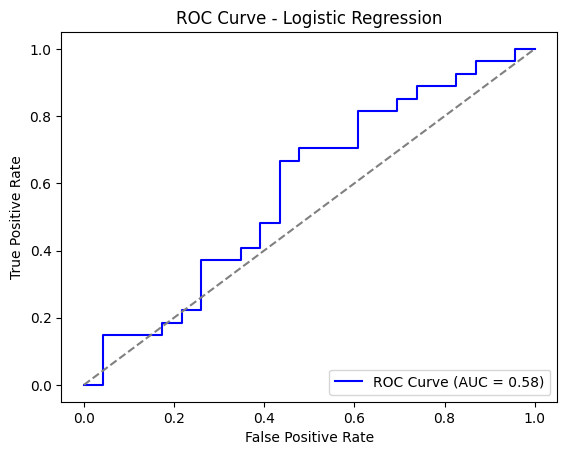

Model: Random Forest
Accuracy: 0.4200
Precision: 0.4615
Recall: 0.4444
F1 Score: 0.4528
AUC (ROC): 0.4420
----------------------------------------------------------------------


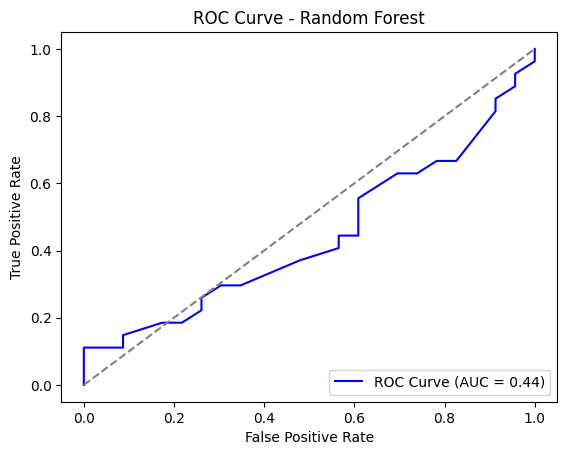

Model: XGBoost
Accuracy: 0.4600
Precision: 0.5000
Recall: 0.4444
F1 Score: 0.4706
AUC (ROC): 0.4074
----------------------------------------------------------------------


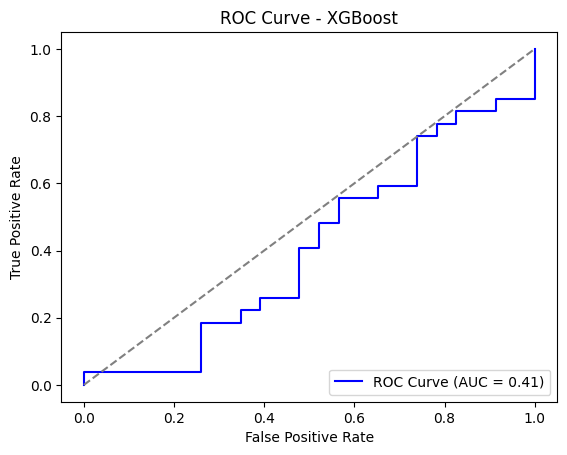

Model: SVM
Accuracy: 0.4800
Precision: 0.5294
Recall: 0.3333
F1 Score: 0.4091
AUC (ROC): 0.4976
----------------------------------------------------------------------


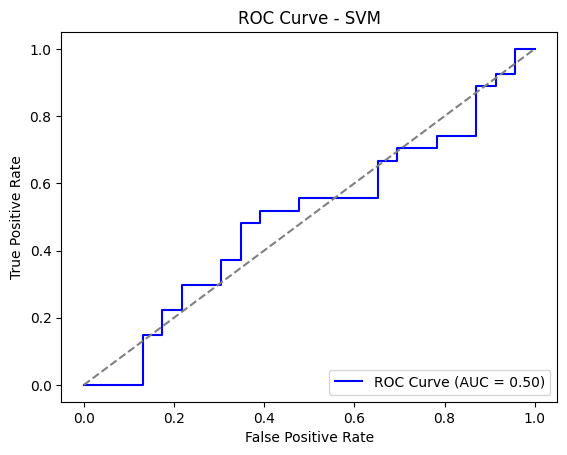

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt

# === Load the cleaned dataset ===
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/cleaned_dataset.csv')

# === Preprocess the data ===
# Convert categorical variables ('Gender', 'Region') to numeric using One-Hot Encoding
# This helps convert non-numeric variables into a numeric format that the models can work with
# 'drop_first=True' removes the first category to avoid multicollinearity (duplicate information)
data = pd.get_dummies(data, columns=['Gender', 'Region'], drop_first=True)

# Define the feature matrix (X) and target variable (y)
# Drop the non-relevant columns ('CustomerID' and 'Feedback') and the target column ('Purchased')
# 'Purchased' is the binary target variable: 1 for purchase, 0 for no purchase
X = data.drop(columns=['Purchased', 'CustomerID', 'Feedback'])
y = data['Purchased']  # The target variable indicating purchase status

# === Split the dataset ===
# Split the dataset into training and testing subsets (80% for training, 20% for testing)
# Random state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Initialize models ===
# Create a dictionary to store model instances for comparison
# Four different classification models are initialized:
# - Logistic Regression
# - Random Forest
# - XGBoost (Gradient Boosting)
# - Support Vector Machine (SVM), with probability estimates enabled for AUC/ROC
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)  # Enable probability estimates for AUC/ROC curve
}

# === Evaluate each model ===
# Loop through the dictionary of models to train and evaluate each model
# model_name represents each key (model's name) and model represents the corresponding value (the actual model object).
# The .items() method is used on a dictionary to return key-value pairs as tuples.
# In this case, models.items() provides each model's name (model_name) and its corresponding object (model) in the loop.
for model_name, model in models.items():
    # Train the model using the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Get the predicted probabilities for the positive class (required for AUC/ROC)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate various evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
    precision = precision_score(y_test, y_pred)  # Precision (True Positives / (True Positives + False Positives))
    recall = recall_score(y_test, y_pred)  # Recall (True Positives / (True Positives + False Negatives))
    f1 = f1_score(y_test, y_pred)  # F1 Score (Harmonic mean of Precision and Recall)
    auc = roc_auc_score(y_test, y_prob)  # AUC (Area Under the ROC Curve)

    # Display the evaluation metrics for the current model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC (ROC): {auc:.4f}")
    print("-" * 70)

    # === Plot the ROC Curve ===
    # Compute the ROC curve (False Positive Rate vs True Positive Rate)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Plot the ROC curve for the current model
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    # Plot a baseline diagonal line for random guessing (AUC = 0.5)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')  # x-axis label
    plt.ylabel('True Positive Rate')  # y-axis label
    plt.title(f'ROC Curve - {model_name}')  # Title with the model name
    plt.legend(loc='lower right')  # Position the legend in the bottom-right corner
    plt.show()  # Show the plot